In [119]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [3]:
import os

USE_CPU = True

if USE_CPU:
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [13]:
NUM_LANES = 2
INPUT_SIZE = (288, 800)
CLS_SHAPE = (100, 20, NUM_LANES)

INPUT_SHAPE = (*INPUT_SIZE, 3)
OUTPUT_SHAPE = CLS_SHAPE

PREFETCH_SIZE = 200

DTYPE = tf.float32

TAKE_LLAMAS_MAX = 1000
TAKE_CULANE_MAX = 0
TAKE_MIWULA_MAX = 0 # all of them

# Ratio of validation data vs training data
VALID_RATIO = 0.3

BATCH_SIZE = 8 # tune to available GPU memory
PREFETCH_SIZE = 200 # tune to available memory


EPOCHS = 20 # training epochs


In [16]:
def display(display_list):
    plt.figure(figsize=(15, 15))
    
    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

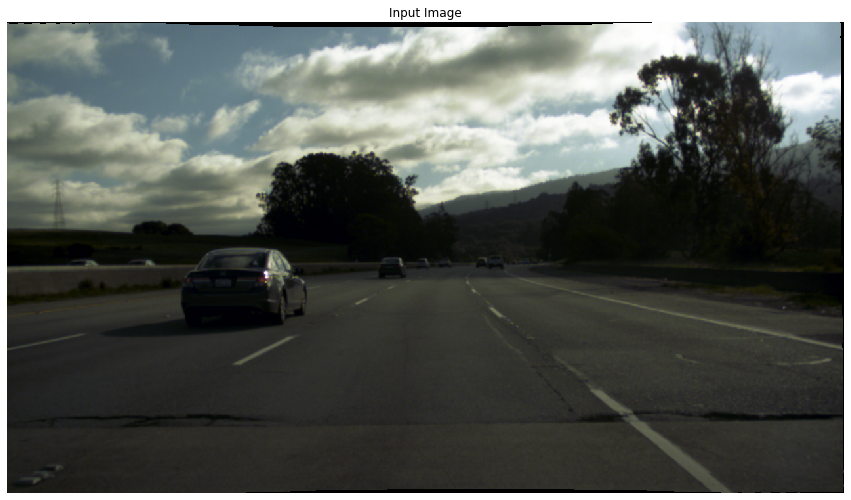

In [116]:
test = cv2.imread('../../llamas/color_images/test/images-2014-12-22-13-22-35_mapping_280S_2nd_lane/1419283775_0857456000_color_rect.png')
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)


display([test])


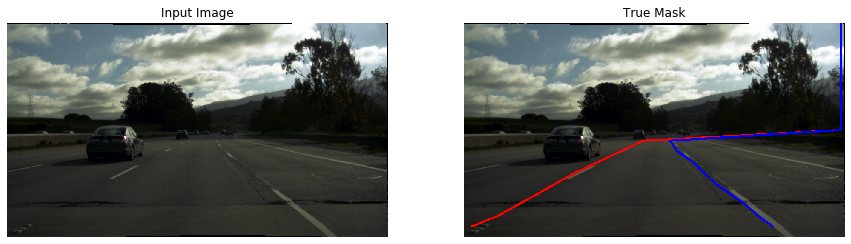

In [118]:
def resize_img(img, shape):
    w = img.shape[1]
    h = img.shape[0]
    
    ratio = shape[1] / shape[0]
    
    tgt = img[h-int(w/ratio):h,0:w]
    tgt = cv2.resize(tgt, (shape[1], shape[0]))
    return tgt

def pred_to_polylines(pred, imgshape):
    n = tf.math.argmax(pred)
    
    n = np.round((n / CLS_SHAPE[0]) * imgshape[1]).astype(np.int)
    y = np.arange(0, len(n)).reshape(-1,1)
    y = np.round((y / CLS_SHAPE[1]) * imgshape[0]).astype(np.int)
        
    for i in range(CLS_SHAPE[-1]):
        x = np.array(n[:,i]).reshape(-1,1)
        
        yield(np.int32([np.hstack((x,y))]))

def pipeline(img_orig):
    img = resize_img(img_orig, INPUT_SIZE) / 255
    
    img_inp = tf.expand_dims(img, axis=0)
    
    pred = ufm.predict(img_inp)[0]
    pred_img = tf.zeros((CLS_SHAPE[0], CLS_SHAPE[1], 3-CLS_SHAPE[2]))
    pred_img = tf.concat([pred, pred_img], -1)
    
    pred_img = np.flipud(np.rot90(pred_img))
    
    img2 = img_orig.copy()
    
    i = 0
    for poly in pred_to_polylines(pred, img2.shape):
        color = (255,0)
        if i > 0:
            color = (0,0,255)
        cv2.polylines(img2, poly, False, color, thickness=5)
        i = i + 1
    
    return img2#, pred_img

p = pipeline(test)
#pred = p[0]

display([test, p])

In [ ]:
from losses import ultrafast_loss

ufm = tf.keras.models.load_model('uf-llamas-16k-20e.tf', custom_objects={'focal_loss_fixed': ultrafast_loss}, compile=False)
ufm.compile(optimizer='adam', loss=ultrafast_loss)

In [123]:
from moviepy.editor import VideoFileClip

clip = '../../llamas/out2.mp4'

clip1 = VideoFileClip(clip)
driving_clip = clip1.fl_image(pipeline)
driving_clip.write_videofile('out2_ultrafast.mp4', audio=False)

                                                                  
t:   9%|▉         | 894/10088 [21:53<1:07:46,  2.26it/s, now=None]
                                                                  
t:   5%|▌         | 611/11151 [13:56<1:23:43,  2.10it/s, now=None]

Moviepy - Building video out2_ultrafast.mp4.
Moviepy - Writing video out2_ultrafast.mp4





t:   0%|          | 0/9778 [00:00<?, ?it/s, now=None]

t:   0%|          | 2/9778 [00:00<36:23,  4.48it/s, now=None]

t:   0%|          | 3/9778 [00:00<45:05,  3.61it/s, now=None]

t:   0%|          | 4/9778 [00:01<50:55,  3.20it/s, now=None]

t:   0%|          | 5/9778 [00:01<55:09,  2.95it/s, now=None]

t:   0%|          | 6/9778 [00:02<58:21,  2.79it/s, now=None]

t:   0%|          | 7/9778 [00:02<1:00:09,  2.71it/s, now=None]

t:   0%|          | 8/9778 [00:02<1:06:11,  2.46it/s, now=None]

t:   0%|          | 9/9778 [00:03<1:06:29,  2.45it/s, now=None]

t:   0%|          | 10/9778 [00:03<1:10:21,  2.31it/s, now=None]

t:   0%|          | 11/9778 [00:04<1:09:11,  2.35it/s, now=None]

t:   0%|          | 12/9778 [00:04<1:08:11,  2.39it/s, now=None]

t:   0%|          | 13/9778 [00:05<1:11:49,  2.27it/s, now=None]

t:   0%|          | 14/9778 [00:05<1:10:12,  2.32it/s, now=None]

t:   0%|          | 15/9778 [00:06<1:13:01,  2.23it/s, now=None]

t:   0%|          | 16/9778 [00:06<1:

t:   1%|          | 114/9778 [00:50<1:08:46,  2.34it/s, now=None]

t:   1%|          | 115/9778 [00:50<1:12:03,  2.24it/s, now=None]

t:   1%|          | 116/9778 [00:51<1:10:07,  2.30it/s, now=None]

t:   1%|          | 117/9778 [00:51<1:12:54,  2.21it/s, now=None]

t:   1%|          | 118/9778 [00:52<1:14:32,  2.16it/s, now=None]

t:   1%|          | 119/9778 [00:52<1:12:25,  2.22it/s, now=None]

t:   1%|          | 120/9778 [00:53<1:14:21,  2.16it/s, now=None]

t:   1%|          | 121/9778 [00:53<1:16:09,  2.11it/s, now=None]

t:   1%|          | 122/9778 [00:54<1:12:36,  2.22it/s, now=None]

t:   1%|▏         | 123/9778 [00:54<1:14:29,  2.16it/s, now=None]

t:   1%|▏         | 124/9778 [00:55<1:12:03,  2.23it/s, now=None]

t:   1%|▏         | 125/9778 [00:55<1:09:59,  2.30it/s, now=None]

t:   1%|▏         | 126/9778 [00:55<1:12:16,  2.23it/s, now=None]

t:   1%|▏         | 127/9778 [00:56<1:10:51,  2.27it/s, now=None]

t:   1%|▏         | 128/9778 [00:56<1:13:19,  2.19it/s, now=No

t:   2%|▏         | 226/9778 [01:40<1:09:26,  2.29it/s, now=None]

t:   2%|▏         | 227/9778 [01:40<1:12:39,  2.19it/s, now=None]

t:   2%|▏         | 228/9778 [01:41<1:14:23,  2.14it/s, now=None]

t:   2%|▏         | 229/9778 [01:41<1:11:09,  2.24it/s, now=None]

t:   2%|▏         | 230/9778 [01:42<1:09:14,  2.30it/s, now=None]

t:   2%|▏         | 231/9778 [01:42<1:12:01,  2.21it/s, now=None]

t:   2%|▏         | 232/9778 [01:43<1:09:42,  2.28it/s, now=None]

t:   2%|▏         | 233/9778 [01:43<1:12:14,  2.20it/s, now=None]

t:   2%|▏         | 234/9778 [01:44<1:14:34,  2.13it/s, now=None]

t:   2%|▏         | 235/9778 [01:44<1:11:52,  2.21it/s, now=None]

t:   2%|▏         | 236/9778 [01:45<1:13:38,  2.16it/s, now=None]

t:   2%|▏         | 237/9778 [01:45<1:10:38,  2.25it/s, now=None]

t:   2%|▏         | 238/9778 [01:45<1:08:47,  2.31it/s, now=None]

t:   2%|▏         | 239/9778 [01:46<1:07:13,  2.36it/s, now=None]

t:   2%|▏         | 240/9778 [01:46<1:10:43,  2.25it/s, now=No

t:   3%|▎         | 338/9778 [02:30<1:08:14,  2.31it/s, now=None]

t:   3%|▎         | 339/9778 [02:31<1:06:52,  2.35it/s, now=None]

t:   3%|▎         | 340/9778 [02:31<1:05:44,  2.39it/s, now=None]

t:   3%|▎         | 341/9778 [02:31<1:05:03,  2.42it/s, now=None]

t:   3%|▎         | 342/9778 [02:32<1:12:52,  2.16it/s, now=None]

t:   4%|▎         | 343/9778 [02:32<1:10:31,  2.23it/s, now=None]

t:   4%|▎         | 344/9778 [02:33<1:08:27,  2.30it/s, now=None]

t:   4%|▎         | 345/9778 [02:33<1:11:35,  2.20it/s, now=None]

t:   4%|▎         | 346/9778 [02:34<1:13:16,  2.15it/s, now=None]

t:   4%|▎         | 347/9778 [02:34<1:10:32,  2.23it/s, now=None]

t:   4%|▎         | 348/9778 [02:35<1:12:56,  2.15it/s, now=None]

t:   4%|▎         | 349/9778 [02:35<1:09:52,  2.25it/s, now=None]

t:   4%|▎         | 350/9778 [02:36<1:12:11,  2.18it/s, now=None]

t:   4%|▎         | 351/9778 [02:36<1:09:21,  2.27it/s, now=None]

t:   4%|▎         | 352/9778 [02:36<1:03:00,  2.49it/s, now=No

t:   5%|▍         | 450/9778 [03:21<1:06:00,  2.35it/s, now=None]

t:   5%|▍         | 451/9778 [03:22<1:09:26,  2.24it/s, now=None]

t:   5%|▍         | 452/9778 [03:22<1:07:26,  2.30it/s, now=None]

t:   5%|▍         | 453/9778 [03:23<1:10:28,  2.21it/s, now=None]

t:   5%|▍         | 454/9778 [03:23<1:12:33,  2.14it/s, now=None]

t:   5%|▍         | 455/9778 [03:24<1:14:05,  2.10it/s, now=None]

t:   5%|▍         | 456/9778 [03:24<1:15:06,  2.07it/s, now=None]

t:   5%|▍         | 457/9778 [03:25<1:11:25,  2.17it/s, now=None]

t:   5%|▍         | 458/9778 [03:25<1:12:45,  2.13it/s, now=None]

t:   5%|▍         | 459/9778 [03:26<1:10:01,  2.22it/s, now=None]

t:   5%|▍         | 460/9778 [03:26<1:12:18,  2.15it/s, now=None]

t:   5%|▍         | 461/9778 [03:27<1:13:40,  2.11it/s, now=None]

t:   5%|▍         | 462/9778 [03:27<1:14:15,  2.09it/s, now=None]

t:   5%|▍         | 463/9778 [03:28<1:11:13,  2.18it/s, now=None]

t:   5%|▍         | 464/9778 [03:28<1:13:03,  2.12it/s, now=No

t:   6%|▌         | 562/9778 [04:13<1:09:50,  2.20it/s, now=None]

t:   6%|▌         | 563/9778 [04:14<1:11:12,  2.16it/s, now=None]

t:   6%|▌         | 564/9778 [04:14<1:12:46,  2.11it/s, now=None]

t:   6%|▌         | 565/9778 [04:15<1:14:12,  2.07it/s, now=None]

t:   6%|▌         | 566/9778 [04:15<1:11:00,  2.16it/s, now=None]

t:   6%|▌         | 567/9778 [04:16<1:12:22,  2.12it/s, now=None]

t:   6%|▌         | 568/9778 [04:16<1:13:54,  2.08it/s, now=None]

t:   6%|▌         | 569/9778 [04:17<1:10:42,  2.17it/s, now=None]

t:   6%|▌         | 570/9778 [04:17<1:15:51,  2.02it/s, now=None]

t:   6%|▌         | 571/9778 [04:18<1:12:11,  2.13it/s, now=None]

t:   6%|▌         | 572/9778 [04:18<1:13:30,  2.09it/s, now=None]

t:   6%|▌         | 573/9778 [04:19<1:18:36,  1.95it/s, now=None]

t:   6%|▌         | 574/9778 [04:19<1:18:35,  1.95it/s, now=None]

t:   6%|▌         | 575/9778 [04:20<1:13:36,  2.08it/s, now=None]

t:   6%|▌         | 576/9778 [04:20<1:18:13,  1.96it/s, now=No

t:   7%|▋         | 674/9778 [05:06<1:06:11,  2.29it/s, now=None]

t:   7%|▋         | 675/9778 [05:06<1:04:30,  2.35it/s, now=None]

t:   7%|▋         | 676/9778 [05:06<1:07:39,  2.24it/s, now=None]

t:   7%|▋         | 677/9778 [05:07<1:09:43,  2.18it/s, now=None]

t:   7%|▋         | 678/9778 [05:07<1:11:21,  2.13it/s, now=None]

t:   7%|▋         | 679/9778 [05:08<1:08:37,  2.21it/s, now=None]

t:   7%|▋         | 680/9778 [05:08<1:10:58,  2.14it/s, now=None]

t:   7%|▋         | 681/9778 [05:09<1:07:56,  2.23it/s, now=None]

t:   7%|▋         | 682/9778 [05:09<1:10:15,  2.16it/s, now=None]

t:   7%|▋         | 683/9778 [05:10<1:07:35,  2.24it/s, now=None]

t:   7%|▋         | 684/9778 [05:10<1:09:49,  2.17it/s, now=None]

t:   7%|▋         | 685/9778 [05:11<1:11:30,  2.12it/s, now=None]

t:   7%|▋         | 686/9778 [05:11<1:08:26,  2.21it/s, now=None]

t:   7%|▋         | 687/9778 [05:11<1:10:18,  2.15it/s, now=None]

t:   7%|▋         | 688/9778 [05:12<1:07:48,  2.23it/s, now=No

t:   8%|▊         | 786/9778 [05:57<1:05:24,  2.29it/s, now=None]

t:   8%|▊         | 787/9778 [05:57<1:04:33,  2.32it/s, now=None]

t:   8%|▊         | 788/9778 [05:58<1:07:29,  2.22it/s, now=None]

t:   8%|▊         | 789/9778 [05:58<1:05:38,  2.28it/s, now=None]

t:   8%|▊         | 790/9778 [05:59<1:08:17,  2.19it/s, now=None]

t:   8%|▊         | 791/9778 [05:59<1:09:51,  2.14it/s, now=None]

t:   8%|▊         | 792/9778 [06:00<1:07:13,  2.23it/s, now=None]

t:   8%|▊         | 793/9778 [06:00<1:09:12,  2.16it/s, now=None]

t:   8%|▊         | 794/9778 [06:01<1:10:30,  2.12it/s, now=None]

t:   8%|▊         | 795/9778 [06:01<1:08:01,  2.20it/s, now=None]

t:   8%|▊         | 796/9778 [06:02<1:13:39,  2.03it/s, now=None]

t:   8%|▊         | 797/9778 [06:02<1:10:11,  2.13it/s, now=None]

t:   8%|▊         | 798/9778 [06:03<1:11:37,  2.09it/s, now=None]

t:   8%|▊         | 799/9778 [06:03<1:12:06,  2.08it/s, now=None]

t:   8%|▊         | 800/9778 [06:04<1:08:47,  2.18it/s, now=No

t:   9%|▉         | 898/9778 [06:49<1:08:46,  2.15it/s, now=None]

t:   9%|▉         | 899/9778 [06:50<1:10:21,  2.10it/s, now=None]

t:   9%|▉         | 900/9778 [06:50<1:10:55,  2.09it/s, now=None]

t:   9%|▉         | 901/9778 [06:50<1:07:58,  2.18it/s, now=None]

t:   9%|▉         | 902/9778 [06:51<1:09:47,  2.12it/s, now=None]

t:   9%|▉         | 903/9778 [06:51<1:10:26,  2.10it/s, now=None]

t:   9%|▉         | 904/9778 [06:52<1:07:51,  2.18it/s, now=None]

t:   9%|▉         | 905/9778 [06:52<1:09:23,  2.13it/s, now=None]

t:   9%|▉         | 906/9778 [06:53<1:10:46,  2.09it/s, now=None]

t:   9%|▉         | 907/9778 [06:53<1:07:13,  2.20it/s, now=None]

t:   9%|▉         | 908/9778 [06:54<1:08:51,  2.15it/s, now=None]

t:   9%|▉         | 909/9778 [06:54<1:06:45,  2.21it/s, now=None]

t:   9%|▉         | 910/9778 [06:55<1:12:33,  2.04it/s, now=None]

t:   9%|▉         | 911/9778 [06:55<1:09:10,  2.14it/s, now=None]

t:   9%|▉         | 912/9778 [06:56<1:14:22,  1.99it/s, now=No

t:  10%|█         | 1010/9778 [07:41<1:11:00,  2.06it/s, now=None]

t:  10%|█         | 1011/9778 [07:41<1:07:35,  2.16it/s, now=None]

t:  10%|█         | 1012/9778 [07:42<1:09:12,  2.11it/s, now=None]

t:  10%|█         | 1013/9778 [07:42<1:10:16,  2.08it/s, now=None]

t:  10%|█         | 1014/9778 [07:43<1:10:42,  2.07it/s, now=None]

t:  10%|█         | 1015/9778 [07:43<1:11:09,  2.05it/s, now=None]

t:  10%|█         | 1016/9778 [07:44<1:07:46,  2.15it/s, now=None]

t:  10%|█         | 1017/9778 [07:44<1:05:05,  2.24it/s, now=None]

t:  10%|█         | 1018/9778 [07:44<1:07:19,  2.17it/s, now=None]

t:  10%|█         | 1019/9778 [07:45<1:08:31,  2.13it/s, now=None]

t:  10%|█         | 1020/9778 [07:45<1:06:04,  2.21it/s, now=None]

t:  10%|█         | 1021/9778 [07:46<1:07:50,  2.15it/s, now=None]

t:  10%|█         | 1022/9778 [07:46<1:05:03,  2.24it/s, now=None]

t:  10%|█         | 1023/9778 [07:47<1:03:32,  2.30it/s, now=None]

t:  10%|█         | 1024/9778 [07:47<1:05:52,  2

t:  11%|█▏        | 1120/9778 [08:32<1:09:04,  2.09it/s, now=None]

t:  11%|█▏        | 1121/9778 [08:32<1:06:13,  2.18it/s, now=None]

t:  11%|█▏        | 1122/9778 [08:33<1:07:28,  2.14it/s, now=None]

t:  11%|█▏        | 1123/9778 [08:33<1:08:28,  2.11it/s, now=None]

t:  11%|█▏        | 1124/9778 [08:34<1:05:49,  2.19it/s, now=None]

t:  12%|█▏        | 1125/9778 [08:34<1:07:41,  2.13it/s, now=None]

t:  12%|█▏        | 1126/9778 [08:35<1:08:25,  2.11it/s, now=None]

t:  12%|█▏        | 1127/9778 [08:35<1:09:26,  2.08it/s, now=None]

t:  12%|█▏        | 1128/9778 [08:35<1:06:27,  2.17it/s, now=None]

t:  12%|█▏        | 1129/9778 [08:36<1:08:02,  2.12it/s, now=None]

t:  12%|█▏        | 1130/9778 [08:36<1:05:10,  2.21it/s, now=None]

t:  12%|█▏        | 1131/9778 [08:37<1:07:00,  2.15it/s, now=None]

t:  12%|█▏        | 1132/9778 [08:37<1:08:26,  2.11it/s, now=None]

t:  12%|█▏        | 1133/9778 [08:38<1:05:31,  2.20it/s, now=None]

t:  12%|█▏        | 1134/9778 [08:38<1:07:28,  2

t:  13%|█▎        | 1230/9778 [09:23<1:08:46,  2.07it/s, now=None]

t:  13%|█▎        | 1231/9778 [09:24<1:05:53,  2.16it/s, now=None]

t:  13%|█▎        | 1232/9778 [09:24<1:11:05,  2.00it/s, now=None]

t:  13%|█▎        | 1233/9778 [09:25<1:10:56,  2.01it/s, now=None]

t:  13%|█▎        | 1234/9778 [09:25<1:06:56,  2.13it/s, now=None]

t:  13%|█▎        | 1235/9778 [09:26<1:08:11,  2.09it/s, now=None]

t:  13%|█▎        | 1236/9778 [09:26<1:05:20,  2.18it/s, now=None]

t:  13%|█▎        | 1237/9778 [09:27<1:06:27,  2.14it/s, now=None]

t:  13%|█▎        | 1238/9778 [09:27<1:04:13,  2.22it/s, now=None]

t:  13%|█▎        | 1239/9778 [09:27<1:05:59,  2.16it/s, now=None]

t:  13%|█▎        | 1240/9778 [09:28<1:07:14,  2.12it/s, now=None]

t:  13%|█▎        | 1241/9778 [09:28<1:08:45,  2.07it/s, now=None]

t:  13%|█▎        | 1242/9778 [09:29<1:09:07,  2.06it/s, now=None]

t:  13%|█▎        | 1243/9778 [09:29<1:09:47,  2.04it/s, now=None]

t:  13%|█▎        | 1244/9778 [09:30<1:06:32,  2

t:  14%|█▎        | 1340/9778 [10:15<1:07:26,  2.09it/s, now=None]

t:  14%|█▎        | 1341/9778 [10:15<1:08:13,  2.06it/s, now=None]

t:  14%|█▎        | 1342/9778 [10:16<1:08:39,  2.05it/s, now=None]

t:  14%|█▎        | 1343/9778 [10:16<1:09:07,  2.03it/s, now=None]

t:  14%|█▎        | 1344/9778 [10:17<1:09:24,  2.02it/s, now=None]

t:  14%|█▍        | 1345/9778 [10:17<1:05:38,  2.14it/s, now=None]

t:  14%|█▍        | 1346/9778 [10:18<1:06:54,  2.10it/s, now=None]

t:  14%|█▍        | 1347/9778 [10:18<1:07:08,  2.09it/s, now=None]

t:  14%|█▍        | 1348/9778 [10:18<1:00:27,  2.32it/s, now=None]

t:  14%|█▍        | 1349/9778 [10:19<58:22,  2.41it/s, now=None]  

t:  14%|█▍        | 1350/9778 [10:19<58:18,  2.41it/s, now=None]

t:  14%|█▍        | 1351/9778 [10:20<1:01:43,  2.28it/s, now=None]

t:  14%|█▍        | 1352/9778 [10:20<1:04:03,  2.19it/s, now=None]

t:  14%|█▍        | 1353/9778 [10:21<1:02:17,  2.25it/s, now=None]

t:  14%|█▍        | 1354/9778 [10:21<1:04:32,  2.1

t:  15%|█▍        | 1450/9778 [11:06<1:01:18,  2.26it/s, now=None]

t:  15%|█▍        | 1451/9778 [11:06<59:41,  2.33it/s, now=None]  

t:  15%|█▍        | 1452/9778 [11:07<1:02:30,  2.22it/s, now=None]

t:  15%|█▍        | 1453/9778 [11:07<1:03:56,  2.17it/s, now=None]

t:  15%|█▍        | 1454/9778 [11:07<1:02:09,  2.23it/s, now=None]

t:  15%|█▍        | 1455/9778 [11:08<1:03:44,  2.18it/s, now=None]

t:  15%|█▍        | 1456/9778 [11:08<1:05:16,  2.12it/s, now=None]

t:  15%|█▍        | 1457/9778 [11:09<1:02:45,  2.21it/s, now=None]

t:  15%|█▍        | 1458/9778 [11:09<1:00:40,  2.29it/s, now=None]

t:  15%|█▍        | 1459/9778 [11:10<1:03:21,  2.19it/s, now=None]

t:  15%|█▍        | 1460/9778 [11:10<1:05:00,  2.13it/s, now=None]

t:  15%|█▍        | 1461/9778 [11:11<1:02:26,  2.22it/s, now=None]

t:  15%|█▍        | 1462/9778 [11:11<1:04:10,  2.16it/s, now=None]

t:  15%|█▍        | 1463/9778 [11:12<1:05:07,  2.13it/s, now=None]

t:  15%|█▍        | 1464/9778 [11:12<1:02:56,  2

t:  16%|█▌        | 1560/9778 [11:55<59:38,  2.30it/s, now=None]  

t:  16%|█▌        | 1561/9778 [11:55<1:02:22,  2.20it/s, now=None]

t:  16%|█▌        | 1562/9778 [11:56<1:03:38,  2.15it/s, now=None]

t:  16%|█▌        | 1563/9778 [11:56<1:01:30,  2.23it/s, now=None]

t:  16%|█▌        | 1564/9778 [11:57<1:03:19,  2.16it/s, now=None]

t:  16%|█▌        | 1565/9778 [11:57<1:00:51,  2.25it/s, now=None]

t:  16%|█▌        | 1566/9778 [11:58<1:02:50,  2.18it/s, now=None]

t:  16%|█▌        | 1567/9778 [11:58<1:04:14,  2.13it/s, now=None]

t:  16%|█▌        | 1568/9778 [11:59<1:02:12,  2.20it/s, now=None]

t:  16%|█▌        | 1569/9778 [11:59<1:00:12,  2.27it/s, now=None]

t:  16%|█▌        | 1570/9778 [11:59<1:02:04,  2.20it/s, now=None]

t:  16%|█▌        | 1571/9778 [12:00<1:04:26,  2.12it/s, now=None]

t:  16%|█▌        | 1572/9778 [12:00<1:05:03,  2.10it/s, now=None]

t:  16%|█▌        | 1573/9778 [12:01<1:01:57,  2.21it/s, now=None]

t:  16%|█▌        | 1574/9778 [12:01<1:03:27,  2

t:  17%|█▋        | 1670/9778 [12:45<1:06:29,  2.03it/s, now=None]

t:  17%|█▋        | 1671/9778 [12:46<1:03:12,  2.14it/s, now=None]

t:  17%|█▋        | 1672/9778 [12:46<1:03:57,  2.11it/s, now=None]

t:  17%|█▋        | 1673/9778 [12:47<1:01:19,  2.20it/s, now=None]

t:  17%|█▋        | 1674/9778 [12:47<1:03:28,  2.13it/s, now=None]

t:  17%|█▋        | 1675/9778 [12:48<1:04:44,  2.09it/s, now=None]

t:  17%|█▋        | 1676/9778 [12:48<1:04:55,  2.08it/s, now=None]

t:  17%|█▋        | 1677/9778 [12:48<1:02:13,  2.17it/s, now=None]

t:  17%|█▋        | 1678/9778 [12:49<1:07:14,  2.01it/s, now=None]

t:  17%|█▋        | 1679/9778 [12:49<1:03:48,  2.12it/s, now=None]

t:  17%|█▋        | 1680/9778 [12:50<1:04:56,  2.08it/s, now=None]

t:  17%|█▋        | 1681/9778 [12:50<1:05:00,  2.08it/s, now=None]

t:  17%|█▋        | 1682/9778 [12:51<1:02:14,  2.17it/s, now=None]

t:  17%|█▋        | 1683/9778 [12:51<1:03:41,  2.12it/s, now=None]

t:  17%|█▋        | 1684/9778 [12:52<1:00:58,  2

t:  18%|█▊        | 1780/9778 [13:37<59:48,  2.23it/s, now=None]  

t:  18%|█▊        | 1781/9778 [13:37<58:05,  2.29it/s, now=None]

t:  18%|█▊        | 1782/9778 [13:38<1:00:16,  2.21it/s, now=None]

t:  18%|█▊        | 1783/9778 [13:38<58:35,  2.27it/s, now=None]  

t:  18%|█▊        | 1784/9778 [13:39<1:00:55,  2.19it/s, now=None]

t:  18%|█▊        | 1785/9778 [13:39<1:02:05,  2.15it/s, now=None]

t:  18%|█▊        | 1786/9778 [13:40<1:03:21,  2.10it/s, now=None]

t:  18%|█▊        | 1787/9778 [13:40<56:54,  2.34it/s, now=None]  

t:  18%|█▊        | 1788/9778 [13:40<55:37,  2.39it/s, now=None]

t:  18%|█▊        | 1789/9778 [13:41<55:07,  2.42it/s, now=None]

t:  18%|█▊        | 1790/9778 [13:41<58:32,  2.27it/s, now=None]

t:  18%|█▊        | 1791/9778 [13:42<56:56,  2.34it/s, now=None]

t:  18%|█▊        | 1792/9778 [13:42<59:20,  2.24it/s, now=None]

t:  18%|█▊        | 1793/9778 [13:43<1:01:24,  2.17it/s, now=None]

t:  18%|█▊        | 1794/9778 [13:43<59:33,  2.23it/s, now=N

t:  19%|█▉        | 1891/9778 [14:29<1:00:35,  2.17it/s, now=None]

t:  19%|█▉        | 1892/9778 [14:29<1:01:51,  2.12it/s, now=None]

t:  19%|█▉        | 1893/9778 [14:30<59:27,  2.21it/s, now=None]  

t:  19%|█▉        | 1894/9778 [14:30<1:00:53,  2.16it/s, now=None]

t:  19%|█▉        | 1895/9778 [14:31<58:41,  2.24it/s, now=None]  

t:  19%|█▉        | 1896/9778 [14:31<1:00:39,  2.17it/s, now=None]

t:  19%|█▉        | 1897/9778 [14:32<1:01:40,  2.13it/s, now=None]

t:  19%|█▉        | 1898/9778 [14:32<59:29,  2.21it/s, now=None]  

t:  19%|█▉        | 1899/9778 [14:33<1:01:15,  2.14it/s, now=None]

t:  19%|█▉        | 1900/9778 [14:33<1:06:18,  1.98it/s, now=None]

t:  19%|█▉        | 1901/9778 [14:34<1:05:42,  2.00it/s, now=None]

t:  19%|█▉        | 1902/9778 [14:34<1:02:22,  2.10it/s, now=None]

t:  19%|█▉        | 1903/9778 [14:35<1:03:17,  2.07it/s, now=None]

t:  19%|█▉        | 1904/9778 [14:35<1:03:43,  2.06it/s, now=None]

t:  19%|█▉        | 1905/9778 [14:35<1:00:27,  2

t:  20%|██        | 2002/9778 [15:21<1:04:20,  2.01it/s, now=None]

t:  20%|██        | 2003/9778 [15:21<1:00:59,  2.12it/s, now=None]

t:  20%|██        | 2004/9778 [15:22<1:01:49,  2.10it/s, now=None]

t:  21%|██        | 2005/9778 [15:22<58:58,  2.20it/s, now=None]  

t:  21%|██        | 2006/9778 [15:22<1:00:50,  2.13it/s, now=None]

t:  21%|██        | 2007/9778 [15:23<1:01:18,  2.11it/s, now=None]

t:  21%|██        | 2008/9778 [15:23<58:56,  2.20it/s, now=None]  

t:  21%|██        | 2009/9778 [15:24<1:00:13,  2.15it/s, now=None]

t:  21%|██        | 2010/9778 [15:24<1:01:36,  2.10it/s, now=None]

t:  21%|██        | 2011/9778 [15:25<59:09,  2.19it/s, now=None]  

t:  21%|██        | 2012/9778 [15:25<1:00:33,  2.14it/s, now=None]

t:  21%|██        | 2013/9778 [15:26<1:01:28,  2.11it/s, now=None]

t:  21%|██        | 2014/9778 [15:26<1:02:18,  2.08it/s, now=None]

t:  21%|██        | 2015/9778 [15:27<59:49,  2.16it/s, now=None]  

t:  21%|██        | 2016/9778 [15:27<1:01:05,  2

t:  22%|██▏       | 2113/9778 [16:12<57:48,  2.21it/s, now=None]

t:  22%|██▏       | 2114/9778 [16:12<56:15,  2.27it/s, now=None]

t:  22%|██▏       | 2115/9778 [16:13<54:46,  2.33it/s, now=None]

t:  22%|██▏       | 2116/9778 [16:13<57:11,  2.23it/s, now=None]

t:  22%|██▏       | 2117/9778 [16:14<55:49,  2.29it/s, now=None]

t:  22%|██▏       | 2118/9778 [16:14<57:53,  2.21it/s, now=None]

t:  22%|██▏       | 2119/9778 [16:15<59:40,  2.14it/s, now=None]

t:  22%|██▏       | 2120/9778 [16:15<1:00:41,  2.10it/s, now=None]

t:  22%|██▏       | 2121/9778 [16:15<58:28,  2.18it/s, now=None]  

t:  22%|██▏       | 2122/9778 [16:16<1:03:21,  2.01it/s, now=None]

t:  22%|██▏       | 2123/9778 [16:17<1:03:04,  2.02it/s, now=None]

t:  22%|██▏       | 2124/9778 [16:17<59:50,  2.13it/s, now=None]  

t:  22%|██▏       | 2125/9778 [16:17<57:26,  2.22it/s, now=None]

t:  22%|██▏       | 2126/9778 [16:18<59:09,  2.16it/s, now=None]

t:  22%|██▏       | 2127/9778 [16:18<56:44,  2.25it/s, now=None]



t:  23%|██▎       | 2225/9778 [17:03<52:36,  2.39it/s, now=None]

t:  23%|██▎       | 2226/9778 [17:04<55:02,  2.29it/s, now=None]

t:  23%|██▎       | 2227/9778 [17:04<53:54,  2.33it/s, now=None]

t:  23%|██▎       | 2228/9778 [17:04<52:57,  2.38it/s, now=None]

t:  23%|██▎       | 2229/9778 [17:05<55:36,  2.26it/s, now=None]

t:  23%|██▎       | 2230/9778 [17:05<58:01,  2.17it/s, now=None]

t:  23%|██▎       | 2231/9778 [17:06<55:36,  2.26it/s, now=None]

t:  23%|██▎       | 2232/9778 [17:06<57:34,  2.18it/s, now=None]

t:  23%|██▎       | 2233/9778 [17:07<55:29,  2.27it/s, now=None]

t:  23%|██▎       | 2234/9778 [17:07<57:57,  2.17it/s, now=None]

t:  23%|██▎       | 2235/9778 [17:08<59:07,  2.13it/s, now=None]

t:  23%|██▎       | 2236/9778 [17:08<56:37,  2.22it/s, now=None]

t:  23%|██▎       | 2237/9778 [17:09<54:46,  2.29it/s, now=None]

t:  23%|██▎       | 2238/9778 [17:09<57:00,  2.20it/s, now=None]

t:  23%|██▎       | 2239/9778 [17:10<58:16,  2.16it/s, now=None]

t:  23%|██

t:  24%|██▍       | 2338/9778 [17:55<56:26,  2.20it/s, now=None]

t:  24%|██▍       | 2339/9778 [17:56<54:54,  2.26it/s, now=None]

t:  24%|██▍       | 2340/9778 [17:56<56:25,  2.20it/s, now=None]

t:  24%|██▍       | 2341/9778 [17:57<54:53,  2.26it/s, now=None]

t:  24%|██▍       | 2342/9778 [17:57<53:28,  2.32it/s, now=None]

t:  24%|██▍       | 2343/9778 [17:57<55:53,  2.22it/s, now=None]

t:  24%|██▍       | 2344/9778 [17:58<54:22,  2.28it/s, now=None]

t:  24%|██▍       | 2345/9778 [17:58<56:03,  2.21it/s, now=None]

t:  24%|██▍       | 2346/9778 [17:59<54:22,  2.28it/s, now=None]

t:  24%|██▍       | 2347/9778 [17:59<56:24,  2.20it/s, now=None]

t:  24%|██▍       | 2348/9778 [18:00<54:34,  2.27it/s, now=None]

t:  24%|██▍       | 2349/9778 [18:00<56:31,  2.19it/s, now=None]

t:  24%|██▍       | 2350/9778 [18:01<57:43,  2.14it/s, now=None]

t:  24%|██▍       | 2351/9778 [18:01<55:54,  2.21it/s, now=None]

t:  24%|██▍       | 2352/9778 [18:02<57:08,  2.17it/s, now=None]

t:  24%|██

t:  25%|██▌       | 2451/9778 [18:47<56:05,  2.18it/s, now=None]

t:  25%|██▌       | 2452/9778 [18:48<57:26,  2.13it/s, now=None]

t:  25%|██▌       | 2453/9778 [18:48<58:26,  2.09it/s, now=None]

t:  25%|██▌       | 2454/9778 [18:49<55:45,  2.19it/s, now=None]

t:  25%|██▌       | 2455/9778 [18:49<57:19,  2.13it/s, now=None]

t:  25%|██▌       | 2456/9778 [18:50<58:03,  2.10it/s, now=None]

t:  25%|██▌       | 2457/9778 [18:50<55:32,  2.20it/s, now=None]

t:  25%|██▌       | 2458/9778 [18:50<57:04,  2.14it/s, now=None]

t:  25%|██▌       | 2459/9778 [18:51<57:56,  2.11it/s, now=None]

t:  25%|██▌       | 2460/9778 [18:51<55:35,  2.19it/s, now=None]

t:  25%|██▌       | 2461/9778 [18:52<53:29,  2.28it/s, now=None]

t:  25%|██▌       | 2462/9778 [18:52<52:12,  2.34it/s, now=None]

t:  25%|██▌       | 2463/9778 [18:53<54:20,  2.24it/s, now=None]

t:  25%|██▌       | 2464/9778 [18:53<53:04,  2.30it/s, now=None]

t:  25%|██▌       | 2465/9778 [18:53<51:55,  2.35it/s, now=None]

t:  25%|██

KeyboardInterrupt: 